## Here I use the premade modules to 
* read in, clean and 
* transform the raw input data. 

I do this for the universal model with 35 assets and the individual five models. I create training and test sets for 3 different time intervals.

**The output should be a suitable input for a tensorflow CNN model.**

## 0. Dependencies
<a id = 'sec1'></a>

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time

import sys
sys.path.append('../utils/')
import data_cleaning 
import get_data
from labelled_image_preparation import data_to_labelled_img
from labels import trading_strategies
from transform  import gramian_angular_field, recurrence_plot, markov_transition_field
from visualize import ts_with_markers


# 1. Read in and clean data

In [8]:
# collecting all data here
datas = []
VarNames = []
TestVarNames = []
Freq= "1B"

## 1.1. Stocks

In [9]:
assets= 'Stocks'
path = "../data/data_raw/" + assets
VarName = "Adj Close"

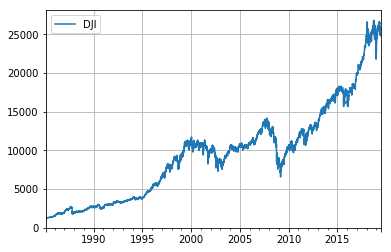

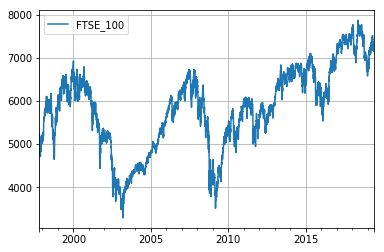

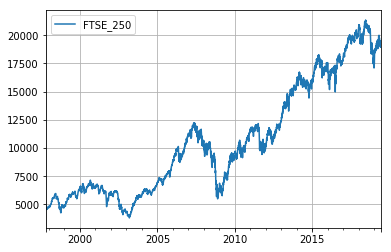

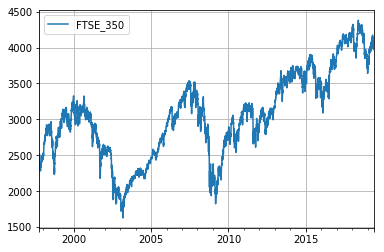

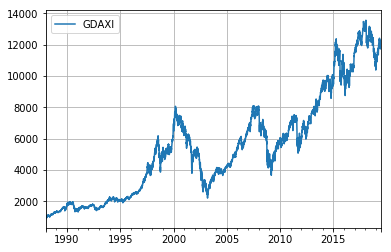

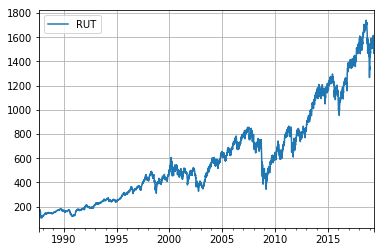

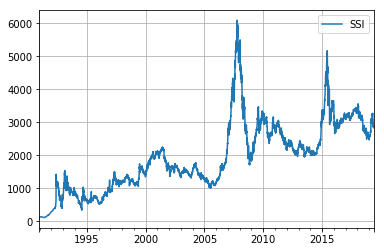

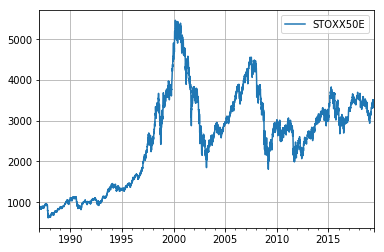

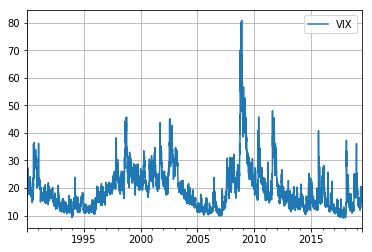

In [10]:
f = open('../data/logs/data_prep_log_'+ assets + '.txt', 'w')
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    VarNames.append(name)
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas.append(df)
    
    # print to log file
    print(name[:-4], file = f)
    print(df.head(), file = f)
    print("Missing values: "+ str(num_missing), file = f)
    print("Summary", file = f)
    print(df.describe(), file = f)
    
    # print(name[:-4]) 
    # df.info()
    df.plot(grid = True)
                     
f.close()

## 1.2. Data to test on

In [11]:
assets= 'Testing'
path = "../data/data_raw/" + assets
VarName = "Adj Close"

# a seperate dataset for those used for testing to create the test data later
datas_test = []

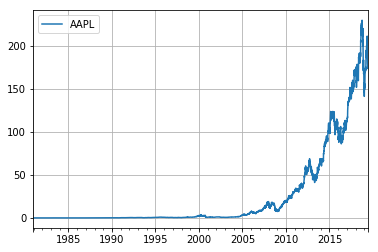

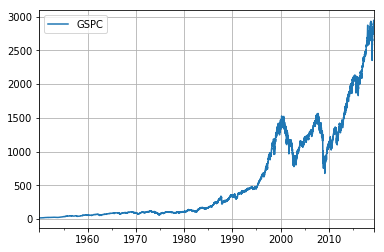

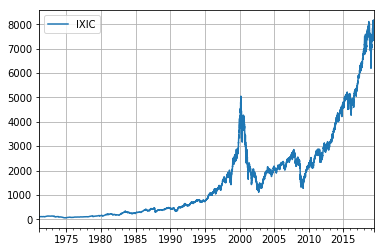

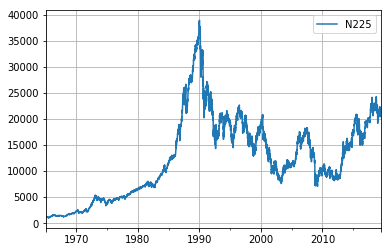

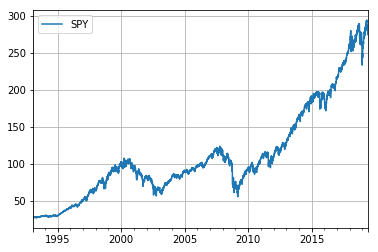

In [12]:
f = open('../data/logs/data_prep_log_'+ assets + '.txt', 'w')
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    TestVarNames.append(name)
    VarNames.append(name)
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas.append(df)
    datas_test.append(df)
    
    # print to log file
    print(name[:-4], file = f)
    print(df.head(), file = f)
    print("Missing values: "+ str(num_missing), file = f)
    print("Summary", file = f)
    print(df.describe(), file = f)
    
    # print(name[:-4]) 
    # df.info()
    df.plot(grid = True)
                     
f.close()

## 1.3. ETFs

In [13]:
assets= 'ETF'
path = "../data/data_raw/" + assets
VarName = "Adj Close"

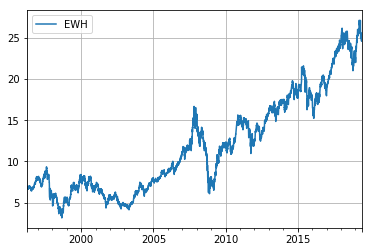

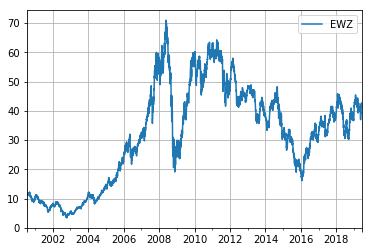

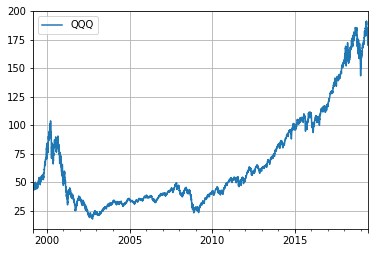

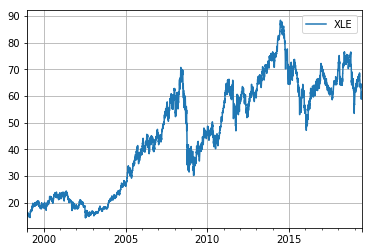

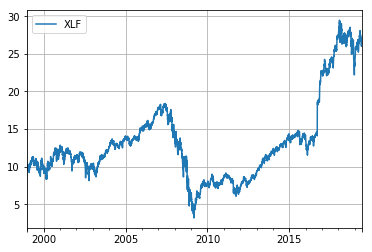

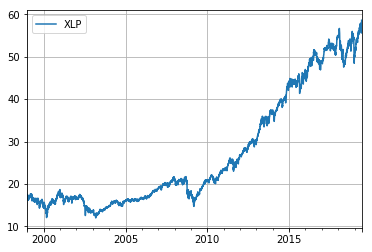

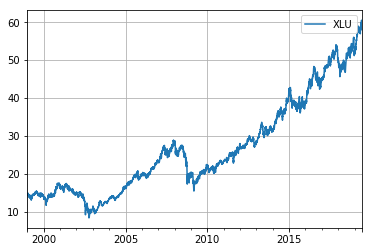

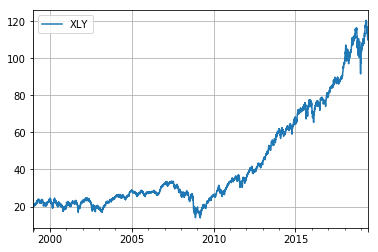

In [14]:
f = open('../data/logs/data_prep_log_'+ assets + '.txt', 'w')
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    VarNames.append(name)
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas.append(df)
    
    # print to log file
    print(name[:-4], file = f)
    print(df.head(), file = f)
    print("Missing values: "+ str(num_missing), file = f)
    print("Summary", file = f)
    print(df.describe(), file = f)
    
    # print(name[:-4]) 
    # df.info()
    df.plot(grid = True)
                     
f.close()

## 1.4. FX

In [15]:
assets= 'FX'
path = "../data/data_raw/" + assets
VarName = "Price"

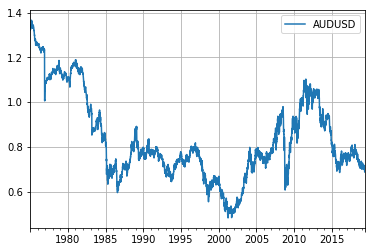

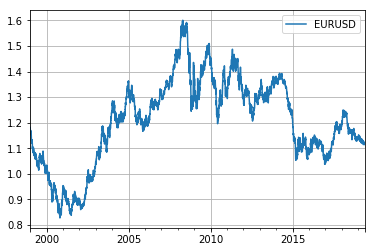

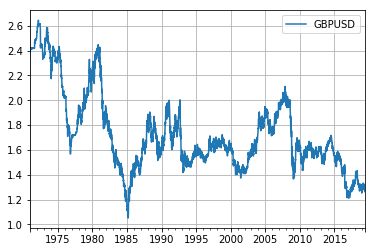

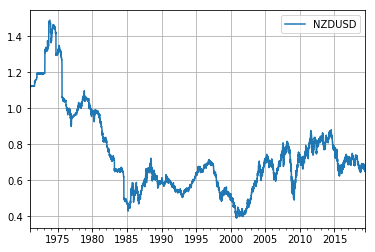

In [16]:
f = open('../data/logs/data_prep_log_'+ assets + '.txt', 'w')
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "DATE",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    VarNames.append(name)
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas.append(df)
    
    # print to log file
    print(name[:-4], file = f)
    print(df.head(), file = f)
    print("Missing values: "+ str(num_missing), file = f)
    print("Summary", file = f)
    print(df.describe(), file = f)
    
    # print(name[:-4]) 
    # df.info()
    df.plot(grid = True)
                     
f.close()

## 1.5. Commods

In [17]:
assets= 'Commods'
path = "../data/data_raw/" + assets
VarName = "price"

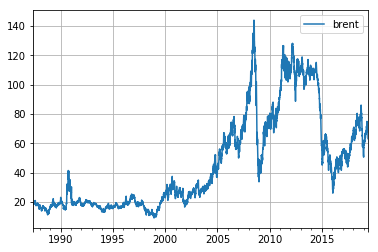

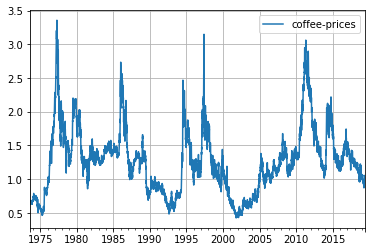

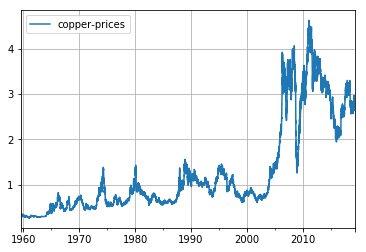

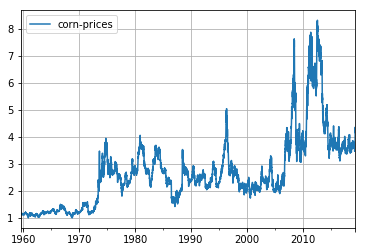

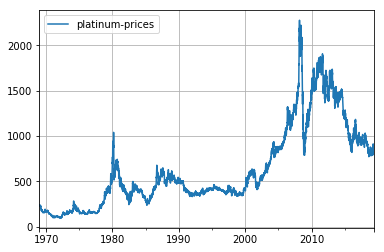

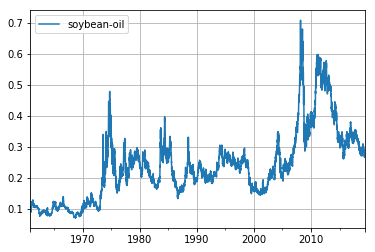

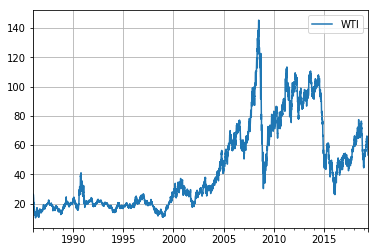

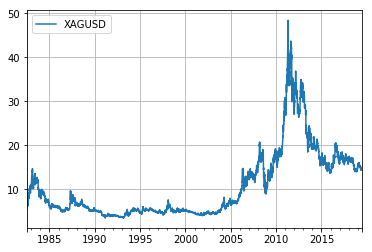

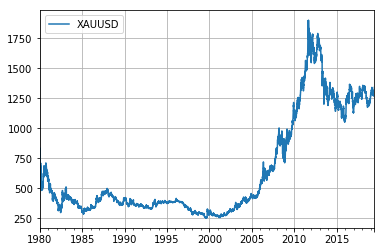

In [18]:
f = open('../data/logs/data_prep_log_'+ assets + '.txt', 'w')
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    VarNames.append(name)
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas.append(df)
    
    # print to log file
    print(name[:-4], file = f)
    print(df.head(), file = f)
    print("Missing values: "+ str(num_missing), file = f)
    print("Summary", file = f)
    print(df.describe(), file = f)
    
    # print(name[:-4]) 
    # df.info()
    df.plot(grid = True)
                     
f.close()

### Datasets:

In [19]:
print("Number of datasets overall: " + str(len(datas)) + ", number of test datasets: " + str(len(datas_test)))

Number of datasets overall: 35, number of test datasets: 5


# 2. Data Labelling & Image transformation
<a id = 'sec3'></a>

### Decide hyperparameters of transformation

In [20]:
Label_window_size = 5
Image_window_size = 20
nbin = 5

# image transformation strategy (will be for all)
Image_trf = ["RP", "GASF", "MTF"]

# Return or Price
Return = True

## 2.1.a Training 1: up to 12-31-2005 

In [21]:
last_date_tr1 = "2005-12-31"
print("Date up to " + last_date_tr1)

Date up to 2005-12-31


## Universal training set

In [16]:
# init arrays
images_tr1 = np.empty((0, Image_window_size, Image_window_size, len(Image_trf)), float)
price_at_image_tr1 = np.empty((0, 1), float)
image_labels_tr1 = np.empty((0, 3), float)

# for log
f = open('../data/logs/images&labels_tr1_log.txt', 'w')
print("Date up to " + last_date_tr1, file = f)

Below is made, so the last floor(label_window_size/2) images are discarded, since we cannot provide a label for them

In [17]:
start_time_tr1 = time.time()
  
for idx, data in enumerate(datas):

    labelled_pd_, price_at_image_, images_, image_labels_, label_names_ = data_to_labelled_img(
        # up to given date
        data=data.loc[:last_date_tr1], 
        column_name=VarNames[idx][:-4], 
        label_window_size = Label_window_size, 
        image_window_size = Image_window_size, 
        image_trf_strat = Image_trf,
        padding_RP = 1,
        standardize_out_RP = True,
        standardize_out_GADF = True,
        standardize_out_GASF = True,
        use_returns = Return,
        num_bin = nbin
    )
    
    print(VarNames[idx][:-4])
    images_tr1 = np.append(images_tr1, images_, axis=0)
    price_at_image_tr1 = np.append(price_at_image_tr1, price_at_image_, axis=0)
    image_labels_tr1 = np.append(image_labels_tr1,image_labels_, axis=0)
    print(str(images_.shape) + ", " + str(price_at_image_.shape) + ", " + str(image_labels_.shape))
    print(VarNames[idx][:-4] + ": added " + str(images_.shape[0]) + " images of shape " + str(images_.shape), file = f)

print("Final number of images: " + str(images_tr1.shape[0]) + " shaped " + str(images_tr1.shape), file = f)    
end_time_tr1 = time.time()
print("it took this long to run: {}".format(end_time_tr1-start_time_tr1), file = f)
f.close()    

DJI
(5427, 30, 30, 3), (5427, 1), (5427, 3)
FTSE_100
(2108, 30, 30, 3), (2108, 1), (2108, 3)
FTSE_250
(2108, 30, 30, 3), (2108, 1), (2108, 3)
FTSE_350
(2108, 30, 30, 3), (2108, 1), (2108, 3)
GDAXI
(4666, 30, 30, 3), (4666, 1), (4666, 3)
RUT
(4745, 30, 30, 3), (4745, 1), (4745, 3)


C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

SSI
(3891, 30, 30, 3), (3891, 1), (3891, 3)
STOXX50E
(4926, 30, 30, 3), (4926, 1), (4926, 3)
VIX
(4142, 30, 30, 3), (4142, 1), (4142, 3)
AAPL
(6504, 30, 30, 3), (6504, 1), (6504, 3)
GSPC
(14577, 30, 30, 3), (14577, 1), (14577, 3)
IXIC
(9074, 30, 30, 3), (9074, 1), (9074, 3)


C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

N225
(10662, 30, 30, 3), (10662, 1), (10662, 3)
SPY
(3339, 30, 30, 3), (3339, 1), (3339, 3)
EWH
(2513, 30, 30, 3), (2513, 1), (2513, 3)


C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

EWZ
(1394, 30, 30, 3), (1394, 1), (1394, 3)
QQQ
(1746, 30, 30, 3), (1746, 1), (1746, 3)
XLE
(1802, 30, 30, 3), (1802, 1), (1802, 3)
XLF
(1802, 30, 30, 3), (1802, 1), (1802, 3)
XLP
(1802, 30, 30, 3), (1802, 1), (1802, 3)
XLU
(1802, 30, 30, 3), (1802, 1), (1802, 3)
XLY
(1802, 30, 30, 3), (1802, 1), (1802, 3)
AUDUSD
(8055, 30, 30, 3), (8055, 1), (8055, 3)
EURUSD
(1793, 30, 30, 3), (1793, 1), (1793, 3)
GBPUSD
(9098, 30, 30, 3), (9098, 1), (9098, 3)


C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\Corvinus\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8)

NZDUSD
(9098, 30, 30, 3), (9098, 1), (9098, 3)
brent
(4826, 30, 30, 3), (4826, 1), (4826, 3)
coffee-prices
(8413, 30, 30, 3), (8413, 1), (8413, 3)
copper-prices
(12098, 30, 30, 3), (12098, 1), (12098, 3)
corn-prices
(12101, 30, 30, 3), (12101, 1), (12101, 3)
platinum-prices
(9620, 30, 30, 3), (9620, 1), (9620, 3)
soybean-oil
(11756, 30, 30, 3), (11756, 1), (11756, 3)
WTI
(5185, 30, 30, 3), (5185, 1), (5185, 3)
XAGUSD
(6099, 30, 30, 3), (6099, 1), (6099, 3)
XAUUSD
(6755, 30, 30, 3), (6755, 1), (6755, 3)


#### Show labelled data

C:\Users\Corvinus\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


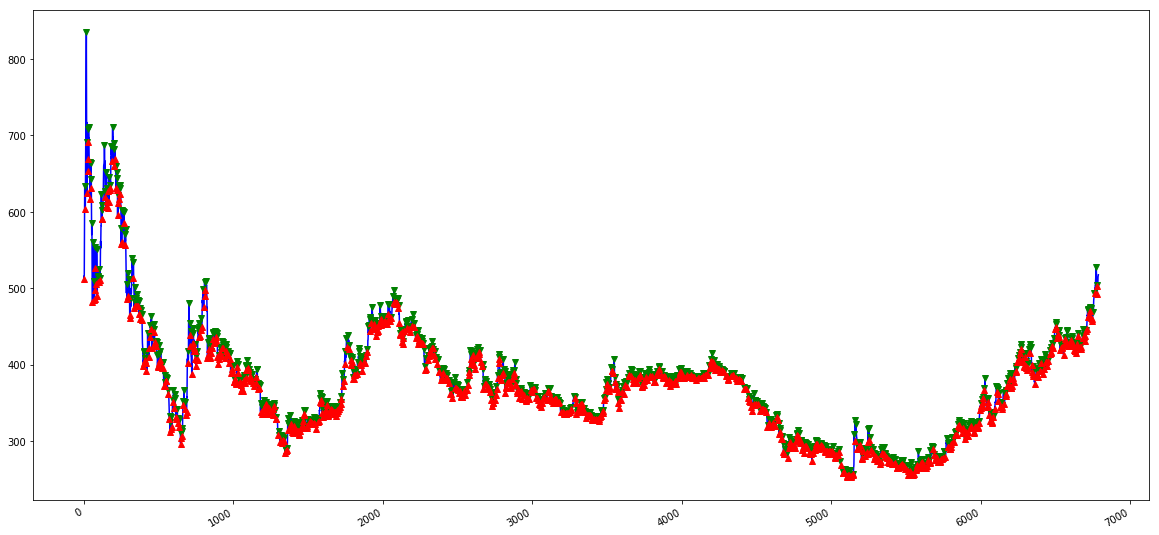

In [18]:
fig = ts_with_markers.plot_ts_markers(data = labelled_pd_,
        main_col = 'Series',
        by_col = "Strategy",
        to_mark = ["Sell", "Buy"],
        color = ['g', 'r'],
        marker_type = ['v', '^']
        )
fig.set_size_inches(20, 10)
fig.show()

#### Print images

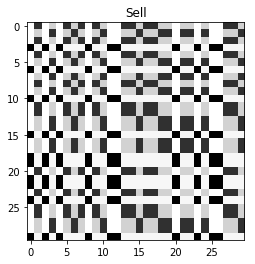

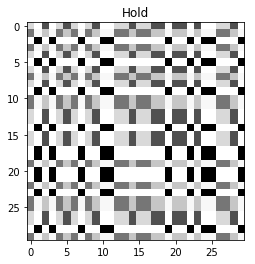

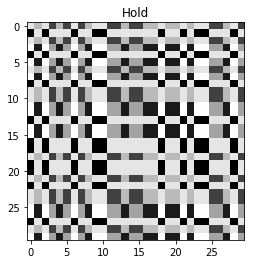

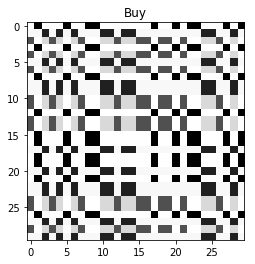

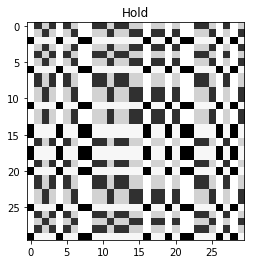

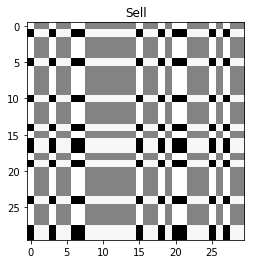

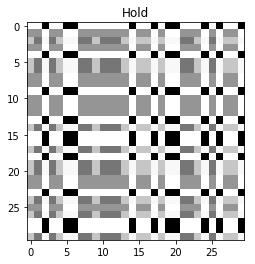

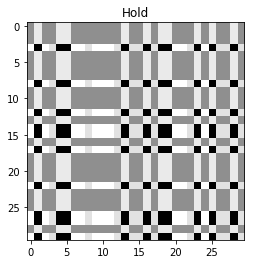

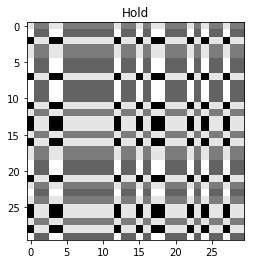

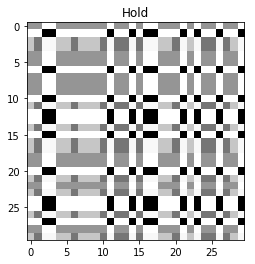

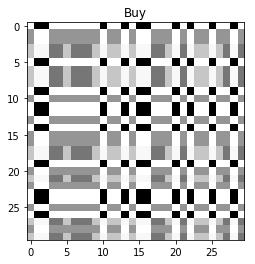

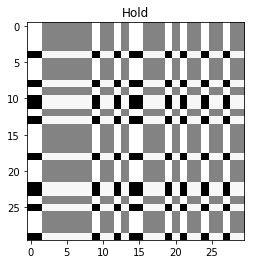

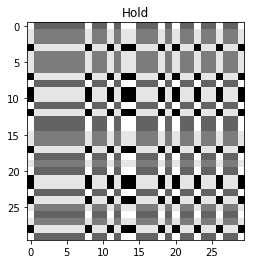

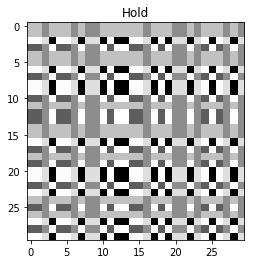

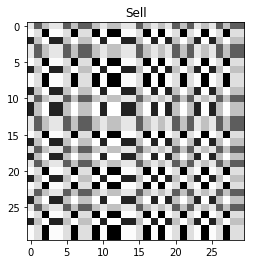

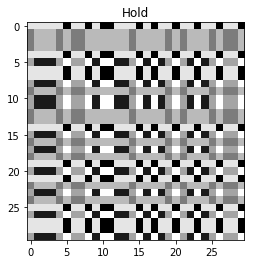

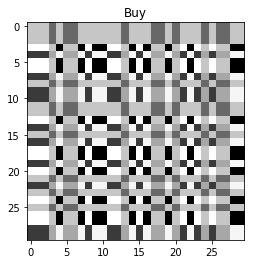

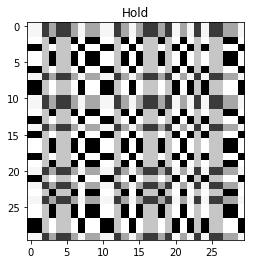

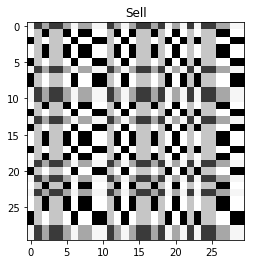

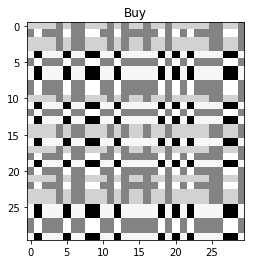

In [19]:
for idx, image in enumerate(images_tr1[:20,:,:,2]):
    plt.imshow(image, cmap = "Greys")
    plt.title(label_names_[np.int(np.argwhere(image_labels_tr1[idx]))])
    plt.show()

### Save images and labels

In [20]:
np.savez('../data/cnn_input/train1/univ_train1_' + str(Freq) + "_Return" + str(Return) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images_tr1, image_labels = image_labels_tr1, label_names = label_names_, price_at_image = price_at_image_tr1
        )

In [21]:
# save memory: 
del images_tr1, image_labels_tr1, price_at_image_tr1

## Individual training sets

In [5]:
# for log
f = open('../data/logs/images&labels_indiv_tr1_log.txt', 'w')
print("Date up to " + last_date_tr1, file = f)

Below is made, so the last floor(label_window_size/2) images are discarded, since we cannot provide a label for them

In [23]:
start_time_tr1 = time.time()
  
for idx, data in enumerate(datas_test):
    print(TestVarNames[idx][:-4])
    labelled_pd_, price_at_image_, images_, image_labels_, label_names_ = data_to_labelled_img(
        # up to given date
        data=data.loc[:last_date_tr1], 
        column_name=TestVarNames[idx][:-4], 
        label_window_size = Label_window_size, 
        image_window_size = Image_window_size, 
        image_trf_strat = Image_trf,
        padding_RP = 1,
        standardize_out_RP = True,
        standardize_out_GADF = True,
        standardize_out_GASF = True,
        use_returns = Return,
        num_bin = nbin
    )
    
    ## SAVE DATA
    np.savez('../data/cnn_input/train1/indiv_train1_'+ str(TestVarNames[idx][:-4]) + "_" + str(Freq) + "_Return" + str(Return) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images_, image_labels = image_labels_, label_names = label_names_, price_at_image = price_at_image_
        )
    
    print(str(images_.shape) + ", " + str(price_at_image_.shape) + ", " + str(image_labels_.shape))
    print(TestVarNames[idx][:-4] + ": " + str(images_.shape[0]) + " images of shape " + str(images_.shape), file = f)

    
end_time_tr1 = time.time()
print("it took this long to run: {}".format(end_time_tr1-start_time_tr1), file = f)
f.close()    

AAPL
(6504, 30, 30, 3), (6504, 1), (6504, 3)
GSPC
(14577, 30, 30, 3), (14577, 1), (14577, 3)
IXIC
(9074, 30, 30, 3), (9074, 1), (9074, 3)
N225


KeyboardInterrupt: 

In [ ]:
# save memory: 
del image_labels_, images_, price_at_image_

## 2.1.b Test 1: from (12-31-2005 - image_window) to 2007-12-31
The first date of the test set is starting (image_window_size-1) before the last date of the training set 

(since the first test image is made with historical data + first new price)

- for **returns** it is starting image_window_size before the last date, because we lose one observation


In [6]:
if Return != True:
    Image_window_size -= 1

first_date_te1 = datas[0].loc[:last_date_tr1].iloc[(-Image_window_size):].first('1D').index[0]
last_date_te1 = "2007-12-31"

IndexError: list index out of range

In [ ]:
print("Date from " + str(first_date_te1) + " to " + last_date_te1)

## Individual test sets

In [ ]:
# for log
f = open('../data/logs/images&labels_indiv_test1_log.txt', 'w')
print("Date from " + str(first_date_te1) + " to " + last_date_te1, file = f)

Below is made, so the last floor(label_window_size/2) images are discarded, since we cannot provide a label for them

In [ ]:
start_time_tr1 = time.time()
  
for idx, data in enumerate(datas_test):
    print(TestVarNames[idx][:-4])
    labelled_pd_, price_at_image_, images_, image_labels_, label_names_ = data_to_labelled_img(
        # from and to given date
        data=data.loc[first_date_te1:last_date_te1], 
        column_name=TestVarNames[idx][:-4], 
        label_window_size = Label_window_size, 
        image_window_size = Image_window_size, 
        image_trf_strat = Image_trf,
        padding_RP = 1,
        standardize_out_RP = True,
        standardize_out_GADF = True,
        standardize_out_GASF = True,
        use_returns = Return,
        num_bin = nbin
    )
    
    ## SAVE DATA
    np.savez('../data/cnn_input/test1/test1_'+ str(TestVarNames[idx][:-4]) + "_" + str(Freq) + "_Return" + str(Return) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images_, image_labels = image_labels_, label_names = label_names_, price_at_image = price_at_image_
        )
    
    print(str(images_.shape) + ", " + str(price_at_image_.shape) + ", " + str(image_labels_.shape))
    print(TestVarNames[idx][:-4] + ": " + str(images_.shape[0]) + " images of shape " + str(images_.shape), file = f)

    
end_time_tr1 = time.time()
print("it took this long to run: {}".format(end_time_tr1-start_time_tr1), file = f)
f.close()    

In [ ]:
# save memory: 
del image_labels_, label_names_, images_, price_at_image_

## 2.2.a Training 2: up to 12-31-2007

In [ ]:
last_date_tr2 = "2007-12-31"
print("Date up to " + last_date_tr2)

## Universal training set

In [ ]:
# init arrays
images_tr2 = np.empty((0, Image_window_size, Image_window_size, len(Image_trf)), float)
price_at_image_tr2 = np.empty((0, 1), float)
image_labels_tr2 = np.empty((0, 3), float)

# for log
f = open('../data/logs/images&labels_tr2_log.txt', 'w')
print("Date up to " + last_date_tr2, file = f)

Below is made, so the last floor(label_window_size/2) images are discarded, since we cannot provide a label for them

In [ ]:
start_time_tr2 = time.time()
  
for idx, data in enumerate(datas):

    labelled_pd_, price_at_image_, images_, image_labels_, label_names_ = data_to_labelled_img(
        # up to given date
        data=data.loc[:last_date_tr2], 
        column_name=VarNames[idx][:-4], 
        label_window_size = Label_window_size, 
        image_window_size = Image_window_size, 
        image_trf_strat = Image_trf,
        padding_RP = 1,
        standardize_out_RP = True,
        standardize_out_GADF = True,
        standardize_out_GASF = True,
        use_returns = Return,
        num_bin = nbin
    )
    
    print(VarNames[idx][:-4])
    images_tr2 = np.append(images_tr2, images_, axis=0)
    price_at_image_tr2 = np.append(price_at_image_tr2, price_at_image_, axis=0)
    image_labels_tr2 = np.append(image_labels_tr2,image_labels_, axis=0)
    print(str(images_.shape) + ", " + str(price_at_image_.shape) + ", " + str(image_labels_.shape))
    print(VarNames[idx][:-4] + ": added " + str(images_.shape[0]) + " images of shape " + str(images_.shape), file = f)

print("Final number of images: " + str(images_tr2.shape[0]) + " shaped " + str(images_tr2.shape), file = f)    
end_time_tr2 = time.time()
print("it took this long to run: {}".format(end_time_tr2-start_time_tr2), file = f)
f.close()    

#### Show labelled data

In [ ]:
fig = ts_with_markers.plot_ts_markers(data = labelled_pd_,
        main_col = 'Series',
        by_col = "Strategy",
        to_mark = ["Sell", "Buy"],
        color = ['g', 'r'],
        marker_type = ['v', '^']
        )
fig.set_size_inches(20, 10)
fig.show()

#### Print images

In [ ]:
for idx, image in enumerate(images_tr2[:20,:,:,2]):
    plt.imshow(image, cmap = "Greys")
    plt.title(label_names_[np.int(np.argwhere(image_labels_tr2[idx]))])
    plt.show()

### Save images and labels

In [ ]:
np.savez('../data/cnn_input/train2/univ_train2_' + str(Freq) + "_Return" + str(Return) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images_tr2, image_labels = image_labels_tr2, label_names = label_names_, price_at_image = price_at_image_tr2
        )

In [ ]:
# save memory: 
del images_tr2, image_labels_tr2, price_at_image_tr2

## Individual training sets

In [ ]:
# for log
f = open('../data/logs/images&labels_indiv_tr2_log.txt', 'w')
print("Date up to " + last_date_tr2, file = f)

Below is made, so the last floor(label_window_size/2) images are discarded, since we cannot provide a label for them

In [ ]:
start_time_tr2 = time.time()
  
for idx, data in enumerate(datas_test):
    print(TestVarNames[idx][:-4])
    labelled_pd_, price_at_image_, images_, image_labels_, label_names_ = data_to_labelled_img(
        # up to given date
        data=data.loc[:last_date_tr2], 
        column_name=TestVarNames[idx][:-4], 
        label_window_size = Label_window_size, 
        image_window_size = Image_window_size, 
        image_trf_strat = Image_trf,
        padding_RP = 1,
        standardize_out_RP = True,
        standardize_out_GADF = True,
        standardize_out_GASF = True,
        use_returns = Return,
        num_bin = nbin
    )
    
    ## SAVE DATA
    np.savez('../data/cnn_input/train2/indiv_train2_'+ str(TestVarNames[idx][:-4]) + "_" + str(Freq) + "_Return" + str(Return) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images_, image_labels = image_labels_, label_names = label_names_, price_at_image = price_at_image_
        )
    
    print(str(images_.shape) + ", " + str(price_at_image_.shape) + ", " + str(image_labels_.shape))
    print(TestVarNames[idx][:-4] + ": " + str(images_.shape[0]) + " images of shape " + str(images_.shape), file = f)

    
end_time_tr2 = time.time()
print("it took this long to run: {}".format(end_time_tr2-start_time_tr2), file = f)
f.close()    

In [ ]:
# save memory: 
del image_labels_, label_names_, images_, price_at_image_

## 2.2.b Test 2: from (12-31-2007 - image_window) to 2009-12-31
The first date of the test set is starting (image_window_size-1) before the last date of the training set 

(since the first test image is made with historical data + first new price)

- for **returns** it is starting image_window_size before the last date, because we lose one observation


In [ ]:
if Return != True:
    Image_window_size -= 1

first_date_te2 = datas[0].loc[:last_date_tr2].iloc[(-Image_window_size):].first('1D').index[0]
last_date_te2 = "2009-12-31"

In [ ]:
print("Date from " + str(first_date_te2) + " to " + last_date_te2)

## Individual test sets

In [ ]:
# for log
f = open('../data/logs/images&labels_indiv_test2_log.txt', 'w')
print("Date from " + str(first_date_te2) + " to " + last_date_te2, file = f)

Below is made, so the last floor(label_window_size/2) images are discarded, since we cannot provide a label for them

In [ ]:
start_time_tr2 = time.time()
  
for idx, data in enumerate(datas_test):
    print(TestVarNames[idx][:-4])
    labelled_pd_, price_at_image_, images_, image_labels_, label_names_ = data_to_labelled_img(
        # from and to given date
        data=data.loc[first_date_te2:last_date_te2], 
        column_name=TestVarNames[idx][:-4], 
        label_window_size = Label_window_size, 
        image_window_size = Image_window_size, 
        image_trf_strat = Image_trf,
        padding_RP = 1,
        standardize_out_RP = True,
        standardize_out_GADF = True,
        standardize_out_GASF = True,
        use_returns = Return,
        num_bin = nbin
    )
    
    ## SAVE DATA
    np.savez('../data/cnn_input/test2/test2_'+ str(TestVarNames[idx][:-4]) + "_" + str(Freq) + "_Return" + str(Return) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images_, image_labels = image_labels_, label_names = label_names_, price_at_image = price_at_image_
        )
    
    print(str(images_.shape) + ", " + str(price_at_image_.shape) + ", " + str(image_labels_.shape))
    print(TestVarNames[idx][:-4] + ": " + str(images_.shape[0]) + " images of shape " + str(images_.shape), file = f)

    
end_time_tr2 = time.time()
print("it took this long to run: {}".format(end_time_tr2-start_time_tr2), file = f)
f.close()    

In [ ]:
# save memory: 
del image_labels_, label_names_, images_, price_at_image_

## 2.3.a Training 3: up to 05-31-2017

In [ ]:
last_date_tr3 = "2017-05-31"
print("Date up to " + last_date_tr3)

## Universal training set

In [ ]:
# init arrays
images_tr3 = np.empty((0, Image_window_size, Image_window_size, len(Image_trf)), float)
price_at_image_tr3 = np.empty((0, 1), float)
image_labels_tr3 = np.empty((0, 3), float)

# for log
f = open('../data/logs/images&labels_tr3_log.txt', 'w')
print("Date up to " + last_date_tr3, file = f)

Below is made, so the last floor(label_window_size/2) images are discarded, since we cannot provide a label for them

In [ ]:
start_time_tr3 = time.time()
  
for idx, data in enumerate(datas):

    labelled_pd_, price_at_image_, images_, image_labels_, label_names_ = data_to_labelled_img(
        # up to given date
        data=data.loc[:last_date_tr3], 
        column_name=VarNames[idx][:-4], 
        label_window_size = Label_window_size, 
        image_window_size = Image_window_size, 
        image_trf_strat = Image_trf,
        padding_RP = 1,
        standardize_out_RP = True,
        standardize_out_GADF = True,
        standardize_out_GASF = True,
        use_returns = Return,
        num_bin = nbin
    )
    
    print(VarNames[idx][:-4])
    images_tr3 = np.append(images_tr3, images_, axis=0)
    price_at_image_tr3 = np.append(price_at_image_tr3, price_at_image_, axis=0)
    image_labels_tr3 = np.append(image_labels_tr3,image_labels_, axis=0)
    print(str(images_.shape) + ", " + str(price_at_image_.shape) + ", " + str(image_labels_.shape))
    print(VarNames[idx][:-4] + ": added " + str(images_.shape[0]) + " images of shape " + str(images_.shape), file = f)

print("Final number of images: " + str(images_tr3.shape[0]) + " shaped " + str(images_tr3.shape), file = f)    
end_time_tr3 = time.time()
print("it took this long to run: {}".format(end_time_tr3-start_time_tr3), file = f)
f.close()    

#### Show labelled data

In [ ]:
fig = ts_with_markers.plot_ts_markers(data = labelled_pd_,
        main_col = 'Series',
        by_col = "Strategy",
        to_mark = ["Sell", "Buy"],
        color = ['g', 'r'],
        marker_type = ['v', '^']
        )
fig.set_size_inches(20, 10)
fig.show()

#### Print images

In [ ]:
for idx, image in enumerate(images_tr3[:20,:,:,2]):
    plt.imshow(image, cmap = "Greys")
    plt.title(label_names_[np.int(np.argwhere(image_labels_tr3[idx]))])
    plt.show()

### Save images and labels

In [ ]:
np.savez('../data/cnn_input/train3/univ_train3_' + str(Freq) + "_Return" + str(Return) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images_tr3, image_labels = image_labels_tr3, label_names = label_names_, price_at_image = price_at_image_tr3
        )

In [ ]:
# save memory: 
del images_tr3, image_labels_tr3, price_at_image_tr3

## Individual training sets

In [ ]:
# for log
f = open('../data/logs/images&labels_indiv_tr3_log.txt', 'w')
print("Date up to " + last_date_tr3, file = f)

Below is made, so the last floor(label_window_size/2) images are discarded, since we cannot provide a label for them

In [ ]:
start_time_tr3 = time.time()
  
for idx, data in enumerate(datas_test):
    print(TestVarNames[idx][:-4])
    labelled_pd_, price_at_image_, images_, image_labels_, label_names_ = data_to_labelled_img(
        # up to given date
        data=data.loc[:last_date_tr3], 
        column_name=TestVarNames[idx][:-4], 
        label_window_size = Label_window_size, 
        image_window_size = Image_window_size, 
        image_trf_strat = Image_trf,
        padding_RP = 1,
        standardize_out_RP = True,
        standardize_out_GADF = True,
        standardize_out_GASF = True,
        use_returns = Return,
        num_bin = nbin
    )
    
    ## SAVE DATA
    np.savez('../data/cnn_input/train3/indiv_train3_'+ str(TestVarNames[idx][:-4]) + "_" + str(Freq) + "_Return" + str(Return) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images_, image_labels = image_labels_, label_names = label_names_, price_at_image = price_at_image_
        )
    
    print(str(images_.shape) + ", " + str(price_at_image_.shape) + ", " + str(image_labels_.shape))
    print(TestVarNames[idx][:-4] + ": " + str(images_.shape[0]) + " images of shape " + str(images_.shape), file = f)

    
end_time_tr3 = time.time()
print("it took this long to run: {}".format(end_time_tr3-start_time_tr3), file = f)
f.close()    

In [ ]:
# save memory: 
del image_labels_, label_names_, images_, price_at_image_

## 2.2.b Test 2: from (05-31-2017 - image_window) to 2019-06-07
The first date of the test set is starting (image_window_size-1) before the last date of the training set 

(since the first test image is made with historical data + first new price)

- for **returns** it is starting image_window_size before the last date, because we lose one observation


In [ ]:
if Return != True:
    Image_window_size -= 1

first_date_te3 = datas[0].loc[:last_date_tr3].iloc[(-Image_window_size):].first('1D').index[0]
last_date_te3 = "2019-06-07"

In [ ]:
print("Date from " + str(first_date_te3) + " to " + last_date_te3)

## Individual test sets

In [ ]:
# for log
f = open('../data/logs/images&labels_indiv_test3_log.txt', 'w')
print("Date from " + str(first_date_te3) + " to " + last_date_te3, file = f)

Below is made, so the last floor(label_window_size/2) images are discarded, since we cannot provide a label for them

In [ ]:
start_time_tr3 = time.time()
  
for idx, data in enumerate(datas_test):
    print(TestVarNames[idx][:-4])
    labelled_pd_, price_at_image_, images_, image_labels_, label_names_ = data_to_labelled_img(
        # from and to given date
        data=data.loc[first_date_te3:last_date_te3], 
        column_name=TestVarNames[idx][:-4], 
        label_window_size = Label_window_size, 
        image_window_size = Image_window_size, 
        image_trf_strat = Image_trf,
        padding_RP = 1,
        standardize_out_RP = True,
        standardize_out_GADF = True,
        standardize_out_GASF = True,
        use_returns = Return,
        num_bin = nbin
    )
    
    ## SAVE DATA
    np.savez('../data/cnn_input/test3/test3_'+ str(TestVarNames[idx][:-4]) + "_" + str(Freq) + "_Return" + str(Return) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images_, image_labels = image_labels_, label_names = label_names_, price_at_image = price_at_image_
        )
    
    print(str(images_.shape) + ", " + str(price_at_image_.shape) + ", " + str(image_labels_.shape))
    print(TestVarNames[idx][:-4] + ": " + str(images_.shape[0]) + " images of shape " + str(images_.shape), file = f)

    
end_time_tr3 = time.time()
print("it took this long to run: {}".format(end_time_tr3-start_time_tr3), file = f)
f.close()    

In [ ]:
# save memory: 
del image_labels_, label_names_, images_, price_at_image_